In [9]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_std_1.csv')

COMMIT_ALG             ONE_PC     TWO_PC
NUM_SERVER_THREADS                      
2                    43.90834   27.94070
4                    81.19814   51.68594
8                   155.81340   95.87924
16                  298.67020  189.48880
32                  577.36260  366.70400


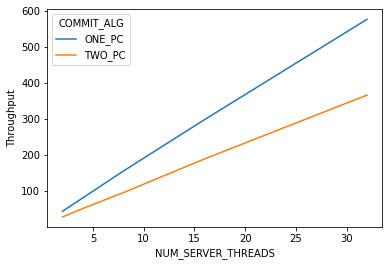

In [25]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads.png")


In [21]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-21-f52b7dcd3b27>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


  COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3     ONE_PC                  16                269.452   
8     TWO_PC                  16                227.181   

   prepare_phase (in us)  commit_phase (in us)  abort (in us)  
3               38632.84              1.398768              0  
8               36273.12          27925.780000              0  


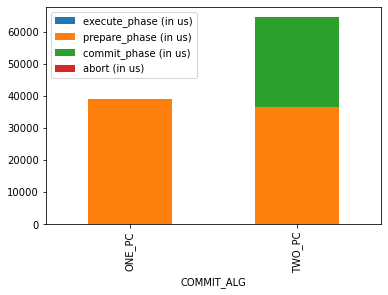

In [22]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
result.plot.bar(stacked='True', x='COMMIT_ALG')